# Simple Perceptron Model

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import reciprocal
import os
import time

# ===== 1. SIMPLE PERCEPTRON MODEL =====
print("=" * 50)
print("1. Simple Perceptron Model")
print("=" * 50)

# Load Iris dataset
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int32)  # Iris setosa?

# Train perceptron
per_clf = Perceptron()
per_clf.fit(X, y)

# Make prediction
y_pred = per_clf.predict([[2, 0.5]])
print(f"Perceptron prediction for [2, 0.5]: {y_pred}")

1. Simple Perceptron Model
Perceptron prediction for [2, 0.5]: [0]


# Image Classifier using the Sequential API - Fashion MNIST Neural Network


2. Fashion MNIST Neural Network
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Fashion MNIST model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6786 - loss: 1.0060 - val_accuracy: 0.8290 - val_loss: 0.5123
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8269 - loss: 0.5047 - val_accuracy: 0.8480 - val_loss: 0.4526
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8393 - loss: 0.4557 - val_accuracy: 0.8494 - val_loss: 0.4433
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8538 - loss: 0.4215 - val_accuracy: 0.8568 - val_loss: 0.4128
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8595 - loss: 0.3970 - val_accuracy: 0.8696 - val_loss: 0.3871
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8633 - loss: 0.3875 - val_accuracy: 0.8574 - val_loss: 0.4038
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8666 - loss: 0.3735 - val_accuracy: 0.8668 - val_loss: 0.3761
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8722 - loss: 0.3597

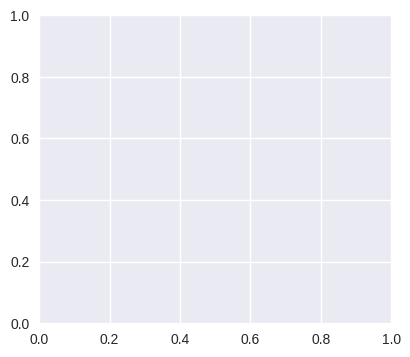

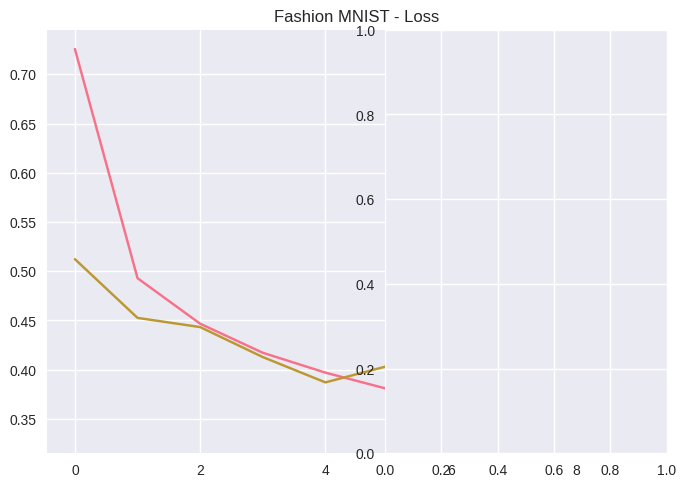

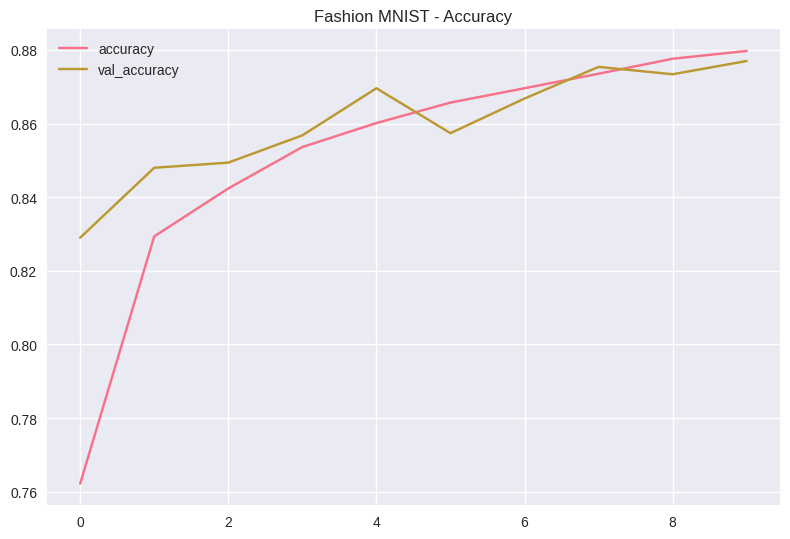

In [24]:
# ===== 2. FASHION MNIST NEURAL NETWORK =====
print("\n" + "=" * 50)
print("2. Fashion MNIST Neural Network")
print("=" * 50)

# Load Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalize and split data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Build Sequential model
model_fashion = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_fashion.compile(loss="sparse_categorical_crossentropy",
                     optimizer="sgd",
                     metrics=["accuracy"])

print("Fashion MNIST model architecture:")
model_fashion.summary()

# Train model
history_fashion = model_fashion.fit(X_train, y_train, epochs=10,
                                   validation_data=(X_valid, y_valid),
                                   verbose=1)

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
pd.DataFrame(history_fashion.history)[['loss', 'val_loss']].plot()
plt.title('Fashion MNIST - Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
pd.DataFrame(history_fashion.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Fashion MNIST - Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# Regression MLP using the Sequential API - California Housing Regression

In [25]:
# ===== 3. CALIFORNIA HOUSING REGRESSION =====
print("\n" + "=" * 50)
print("3. California Housing Regression")
print("=" * 50)

# Load and prepare data
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Build regression model
model_housing = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(1)
])

model_housing.compile(loss="mean_squared_error", optimizer="sgd")

print("Housing regression model architecture:")
model_housing.summary()

# Train model
history_housing = model_housing.fit(X_train_scaled, y_train, epochs=20,
                                   validation_data=(X_valid_scaled, y_valid),
                                   verbose=1)

# Evaluate model
mse_test = model_housing.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MSE: {mse_test:.4f}")

# Make predictions
X_new = X_test_scaled[:3]  # pretend these are new instances
y_pred = model_housing.predict(X_new)
print(f"Predictions for first 3 test samples: {y_pred.flatten()}")
print(f"Actual values: {y_test[:3]}")


3. California Housing Regression
Housing regression model architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2311 - val_loss: 147.9195
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.6444 - val_loss: 0.5077
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4269 - val_loss: 0.4203
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4118 - val_loss: 0.3687
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3901 - val_loss: 0.4360
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3810 - val_loss: 0.4323
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3907 - val_loss: 0.3722
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3756 - val_loss: 0.3671
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3606 - val_loss: 0.3881
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3656 - val_loss: 0.4158
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3608 - val_loss: 0.3416
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

# Complex Models Using the Functional API

In [26]:
# ===== 4. FUNCTIONAL API MODEL WITH SKIP CONNECTION =====
print("\n" + "=" * 50)
print("4. Functional API Model with Skip Connection")
print("=" * 50)

# Build model with skip connection
input_layer = keras.layers.Input(shape=X_train_scaled.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_layer)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_layer, hidden2])
output = keras.layers.Dense(1)(concat)

model_functional = keras.Model(inputs=[input_layer], outputs=[output])
model_functional.compile(loss="mse", optimizer="sgd")

print("Functional API model with skip connection:")
model_functional.summary()


4. Functional API Model with Skip Connection
Functional API model with skip connection:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 30)        │        270 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        930 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

## Wide and Deep Model

In [27]:

# ===== 5. WIDE AND DEEP MODEL =====
print("\n" + "=" * 50)
print("5. Wide and Deep Model")
print("=" * 50)

# Define inputs
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

# Deep part
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate wide and deep
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

# Create model
model_wide_deep = keras.Model(inputs=[input_A, input_B], outputs=[output])
model_wide_deep.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Prepare data for wide and deep model
X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]

print("Wide and Deep model architecture:")
model_wide_deep.summary()

# Train model
history_wd = model_wide_deep.fit([X_train_A, X_train_B], y_train, epochs=20,
                                validation_data=([X_valid_A, X_valid_B], y_valid),
                                verbose=1)

# Evaluate
mse_test_wd = model_wide_deep.evaluate([X_test_A, X_test_B], y_test, verbose=0)
print(f"Wide and Deep Test MSE: {mse_test_wd:.4f}")



5. Wide and Deep Model
Wide and Deep model architecture:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 30)        │        210 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 30)        │        930 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 35)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         36 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,176 (4.59 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3060 - val_loss: 1.6397
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8599 - val_loss: 0.7319
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6844 - val_loss: 0.6596
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6281 - val_loss: 0.5872
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5971 - val_loss: 0.5486
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5742 - val_loss: 0.5339
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5611 - val_loss: 0.5120
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5288 - val_loss: 0.5059
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5214 - val_loss: 0.4863
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5207 - val_loss: 0.4786
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5174 - val_loss: 0.4670
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## Multi Output Model

In [28]:
# ===== 6. MULTI-OUTPUT MODEL =====
print("\n" + "=" * 50)
print("6. Multi-Output Model")
print("=" * 50)

# Build multi-output model
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

# Main output
main_output = keras.layers.Dense(1, name="main_output")(concat)
# Auxiliary output
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model_multi = keras.Model(inputs=[input_A, input_B],
                         outputs=[main_output, aux_output])

model_multi.compile(loss="mse", optimizer="sgd")

print("Multi-output model architecture:")
model_multi.summary()

# Train model
history_multi = model_multi.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
    verbose=1)

# Evaluate
results = model_multi.evaluate([X_test_A, X_test_B], [y_test, y_test], verbose=0)
total_loss, main_loss, aux_loss = results
print(f"Total loss: {total_loss:.4f}, Main loss: {main_loss:.4f}, Aux loss: {aux_loss:.4f}")

# Make predictions
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
y_pred_main, y_pred_aux = model_multi.predict([X_new_A, X_new_B])
print(f"Main predictions: {y_pred_main.flatten()}")
print(f"Aux predictions: {y_pred_aux.flatten()}")


6. Multi-Output Model
Multi-output model architecture:


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 30)        │        210 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 30)        │        930 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 35)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 1)         │         36 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_output (Dense)  │ (None, 1)         │         31 │ dense_11[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,207 (4.71 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 1.5961 - loss: 3.2129 - main_output_loss: 1.6168 - val_aux_output_loss: 0.6801 - val_loss: 7.9492 - val_main_output_loss: 7.2653
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.6495 - loss: 1.1762 - main_output_loss: 0.5266 - val_aux_output_loss: 0.5250 - val_loss: 1.0600 - val_main_output_loss: 0.5347
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.5585 - loss: 0.9866 - main_output_loss: 0.4281 - val_aux_output_loss: 0.5967 - val_loss: 1.0499 - val_main_output_loss: 0.4529
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.5558 - loss: 0.9792 - main_output_loss: 0.4234 - val_aux_output_loss: 0.7046 - val_loss: 1.1570 - val_main_output_loss: 0.4521
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.5183 - loss: 0.9268 - main_output_loss: 0.4085 - val_aux_output_loss: 0.4766 - val_loss: 0.8513 - val_main_output_loss: 0.3745


# Dynamic Models using the Subclassing API

## Custom Model Class

In [29]:
# ===== 7. CUSTOM MODEL CLASS =====
print("\n" + "=" * 50)
print("7. Custom Model Class")
print("=" * 50)

class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

# Create and compile custom model
custom_model = WideAndDeepModel()
custom_model.compile(loss="mse", optimizer="sgd")

print("Custom model class created successfully!")


7. Custom Model Class
Custom model class created successfully!


## Callbacks

In [30]:

# ===== 8. CALLBACKS AND MODEL SAVING =====
print("\n" + "=" * 50)
print("8. Callbacks and Model Saving")
print("=" * 50)

# Build a simple model for demonstration
demo_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(1)
])
demo_model.compile(loss="mse", optimizer="sgd")

# Define callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Custom callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if logs.get("val_loss") and logs.get("loss"):
            print(f"\nval/train: {logs['val_loss'] / logs['loss']:.2f}")

custom_cb = PrintValTrainRatioCallback()

# Train with callbacks
print("Training with callbacks...")
history_callbacks = demo_model.fit(
    X_train_scaled, y_train, epochs=20,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb, custom_cb],
    verbose=0)

print("Model saved successfully!")


8. Callbacks and Model Saving
Training with callbacks...



val/train: 3.16

val/train: 24.97

val/train: 10.06



val/train: 1.56



val/train: 0.99



val/train: 0.95



val/train: 0.94

val/train: 0.97



val/train: 0.98

val/train: 1.00



val/train: 0.94

val/train: 1.02



val/train: 0.94



val/train: 0.94

val/train: 0.98

val/train: 1.06

val/train: 0.98



val/train: 0.92

val/train: 1.12

val/train: 0.94
Model saved successfully!


# Hyperparameter Tuning

In [31]:
# ===== 9. HYPERPARAMETER TUNING =====
print("\n" + "=" * 50)
print("9. Hyperparameter Tuning")
print("=" * 50)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

# Note: KerasRegressor is deprecated, using newer approach
print("Hyperparameter tuning function created!")
print("For actual tuning, consider using Keras Tuner or manual grid search.")

# Example of manual hyperparameter testing
param_combinations = [
    {"n_hidden": 1, "n_neurons": 20, "learning_rate": 1e-3},
    {"n_hidden": 2, "n_neurons": 30, "learning_rate": 3e-3},
    {"n_hidden": 1, "n_neurons": 50, "learning_rate": 1e-2}
]

best_score = float('inf')
best_params = None

for params in param_combinations:
    print(f"Testing params: {params}")
    model = build_model(input_shape=[X_train_scaled.shape[1]], **params)

    # Train for fewer epochs for demonstration
    history = model.fit(X_train_scaled, y_train, epochs=5,
                       validation_data=(X_valid_scaled, y_valid),
                       verbose=0)

    val_loss = min(history.history['val_loss'])
    if val_loss < best_score:
        best_score = val_loss
        best_params = params

print(f"\nBest parameters: {best_params}")
print(f"Best validation loss: {best_score:.4f}")

print("\n" + "=" * 50)
print("All models created and tested successfully!")
print("=" * 50)


9. Hyperparameter Tuning
Hyperparameter tuning function created!
For actual tuning, consider using Keras Tuner or manual grid search.
Testing params: {'n_hidden': 1, 'n_neurons': 20, 'learning_rate': 0.001}
Testing params: {'n_hidden': 2, 'n_neurons': 30, 'learning_rate': 0.003}
Testing params: {'n_hidden': 1, 'n_neurons': 50, 'learning_rate': 0.01}

Best parameters: {'n_hidden': 1, 'n_neurons': 50, 'learning_rate': 0.01}
Best validation loss: 0.3759

All models created and tested successfully!


# Visualization

Creating Iris Dataset Visualizations...


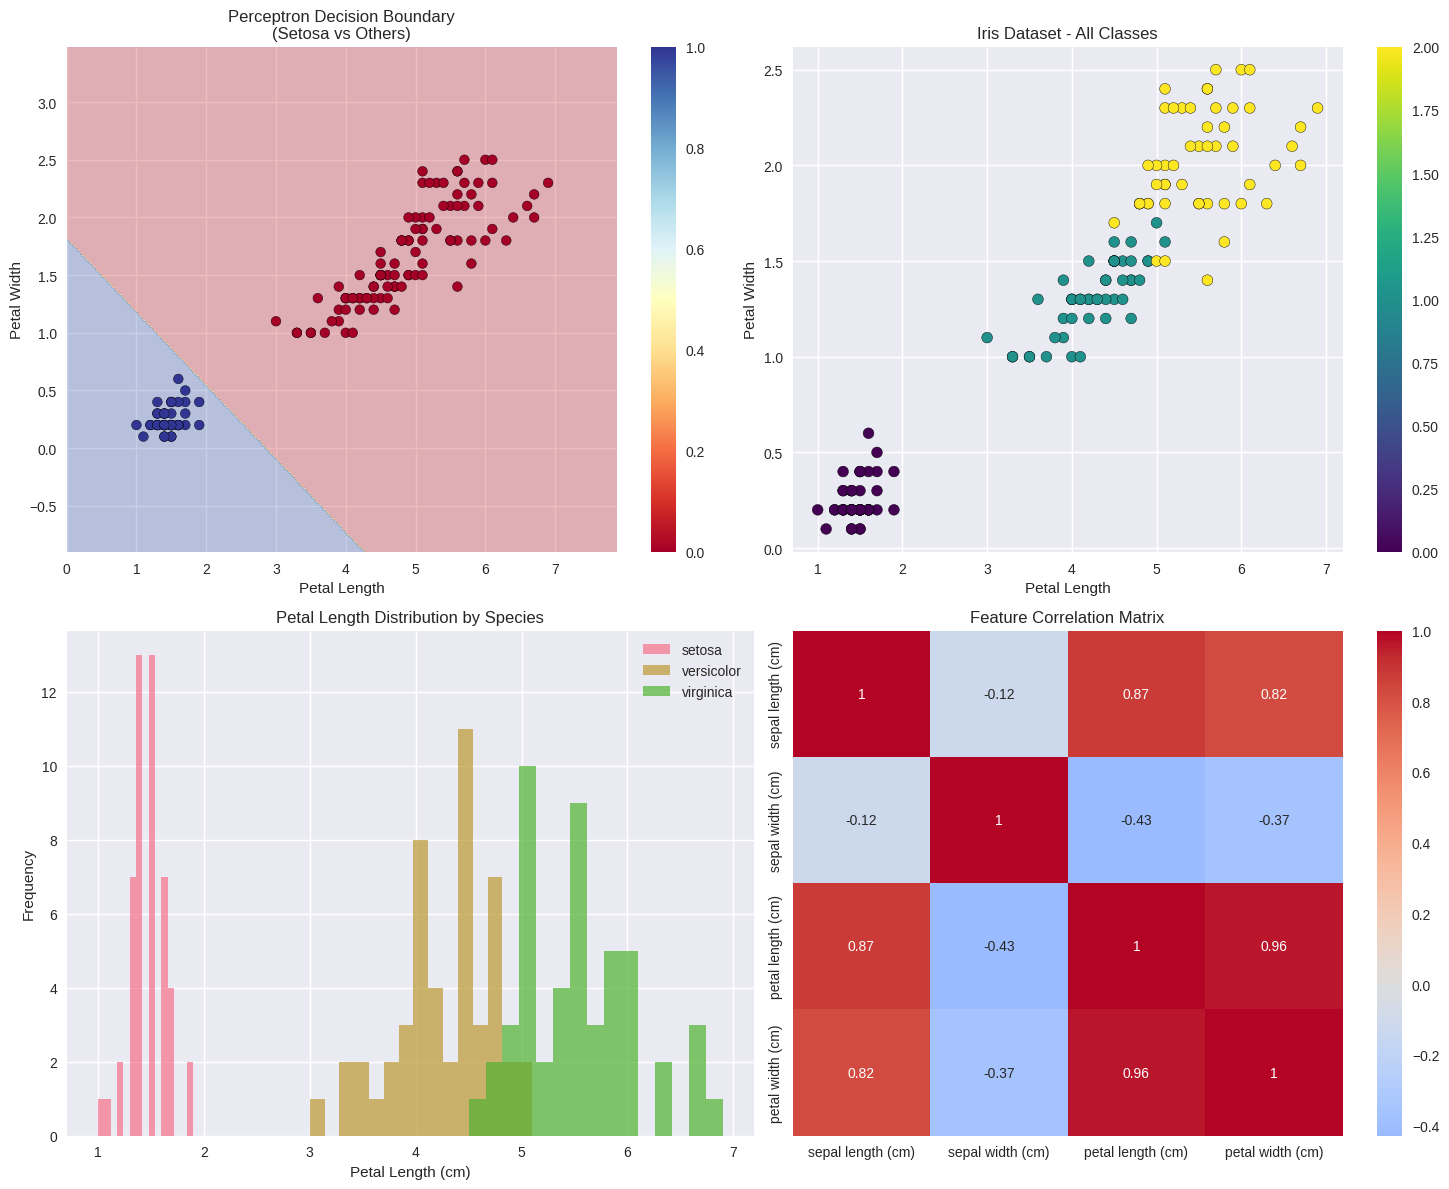

Creating Fashion MNIST Visualizations...


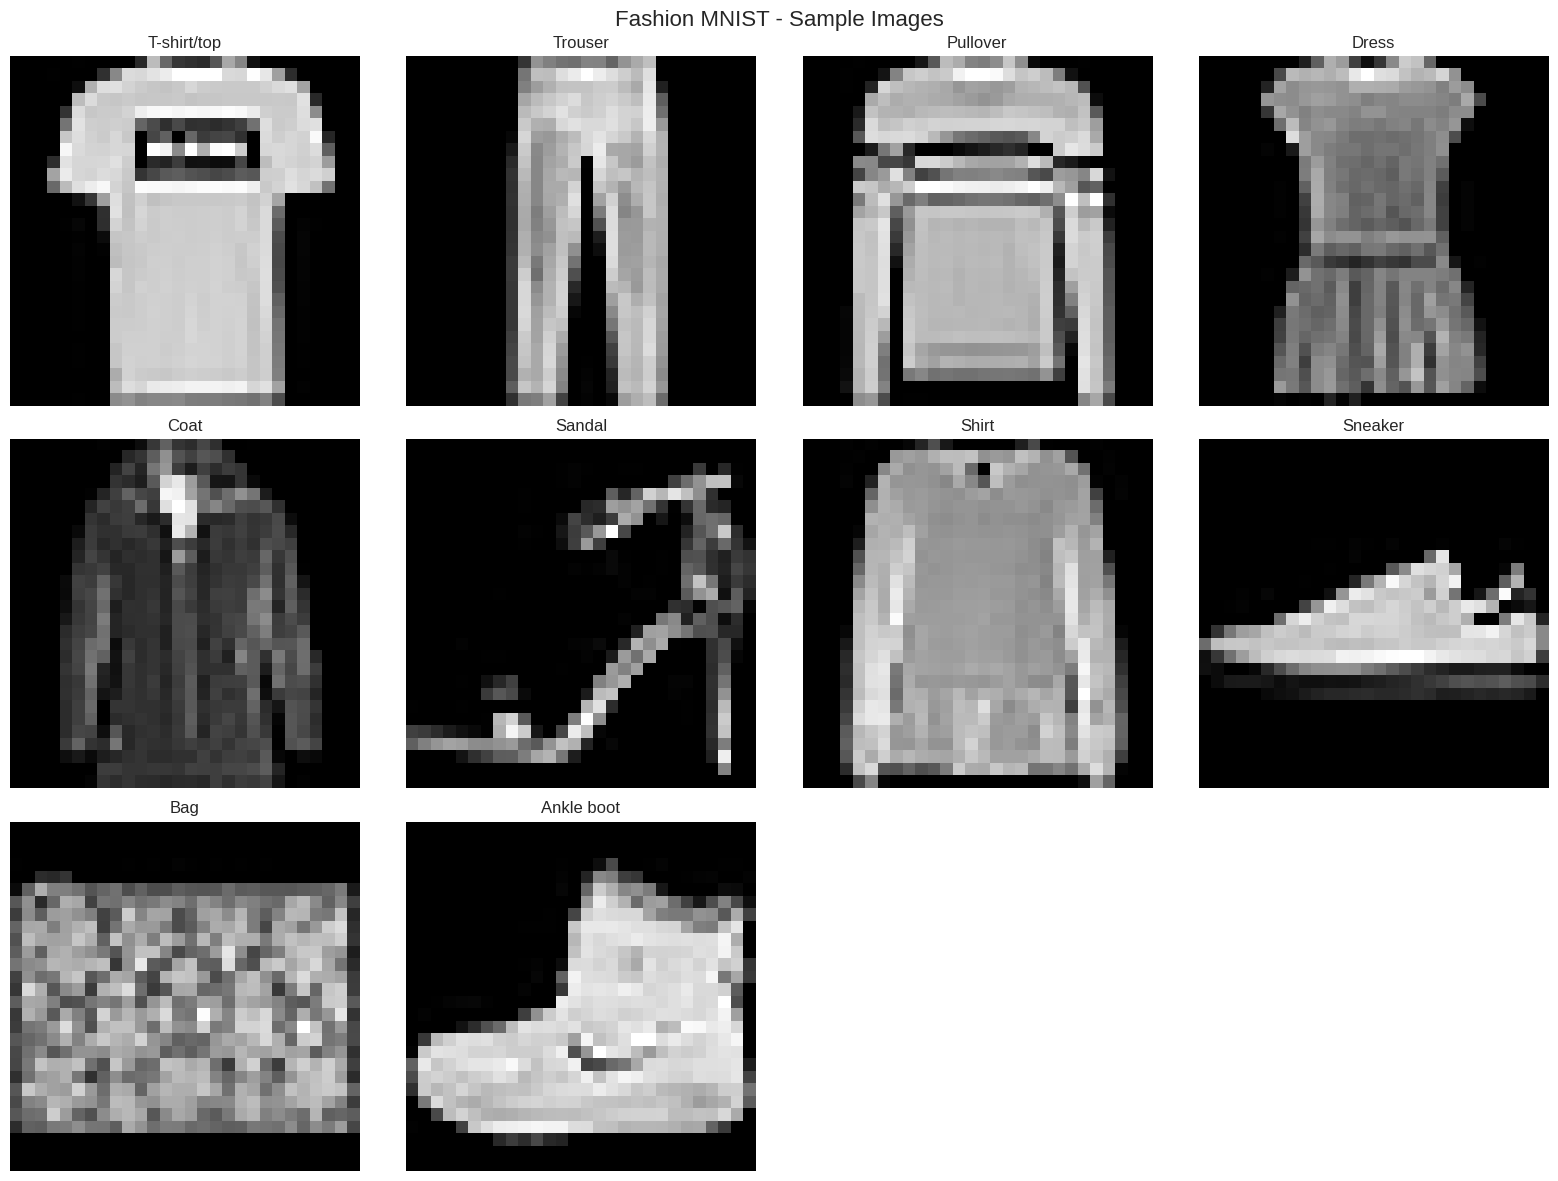

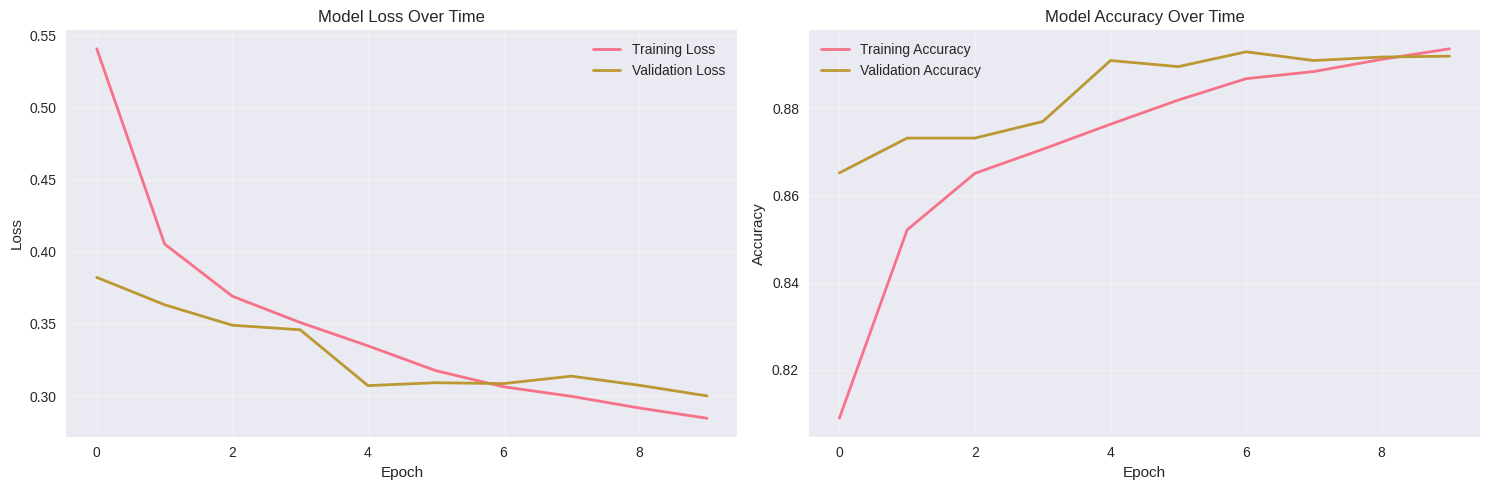

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


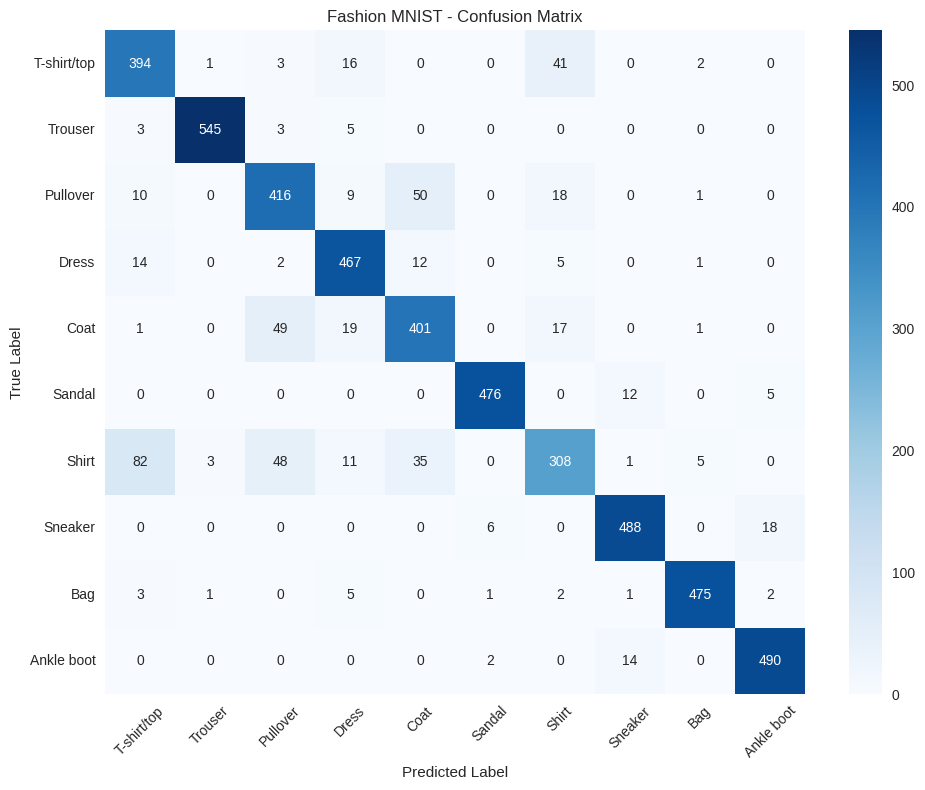

Creating California Housing Visualizations...
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


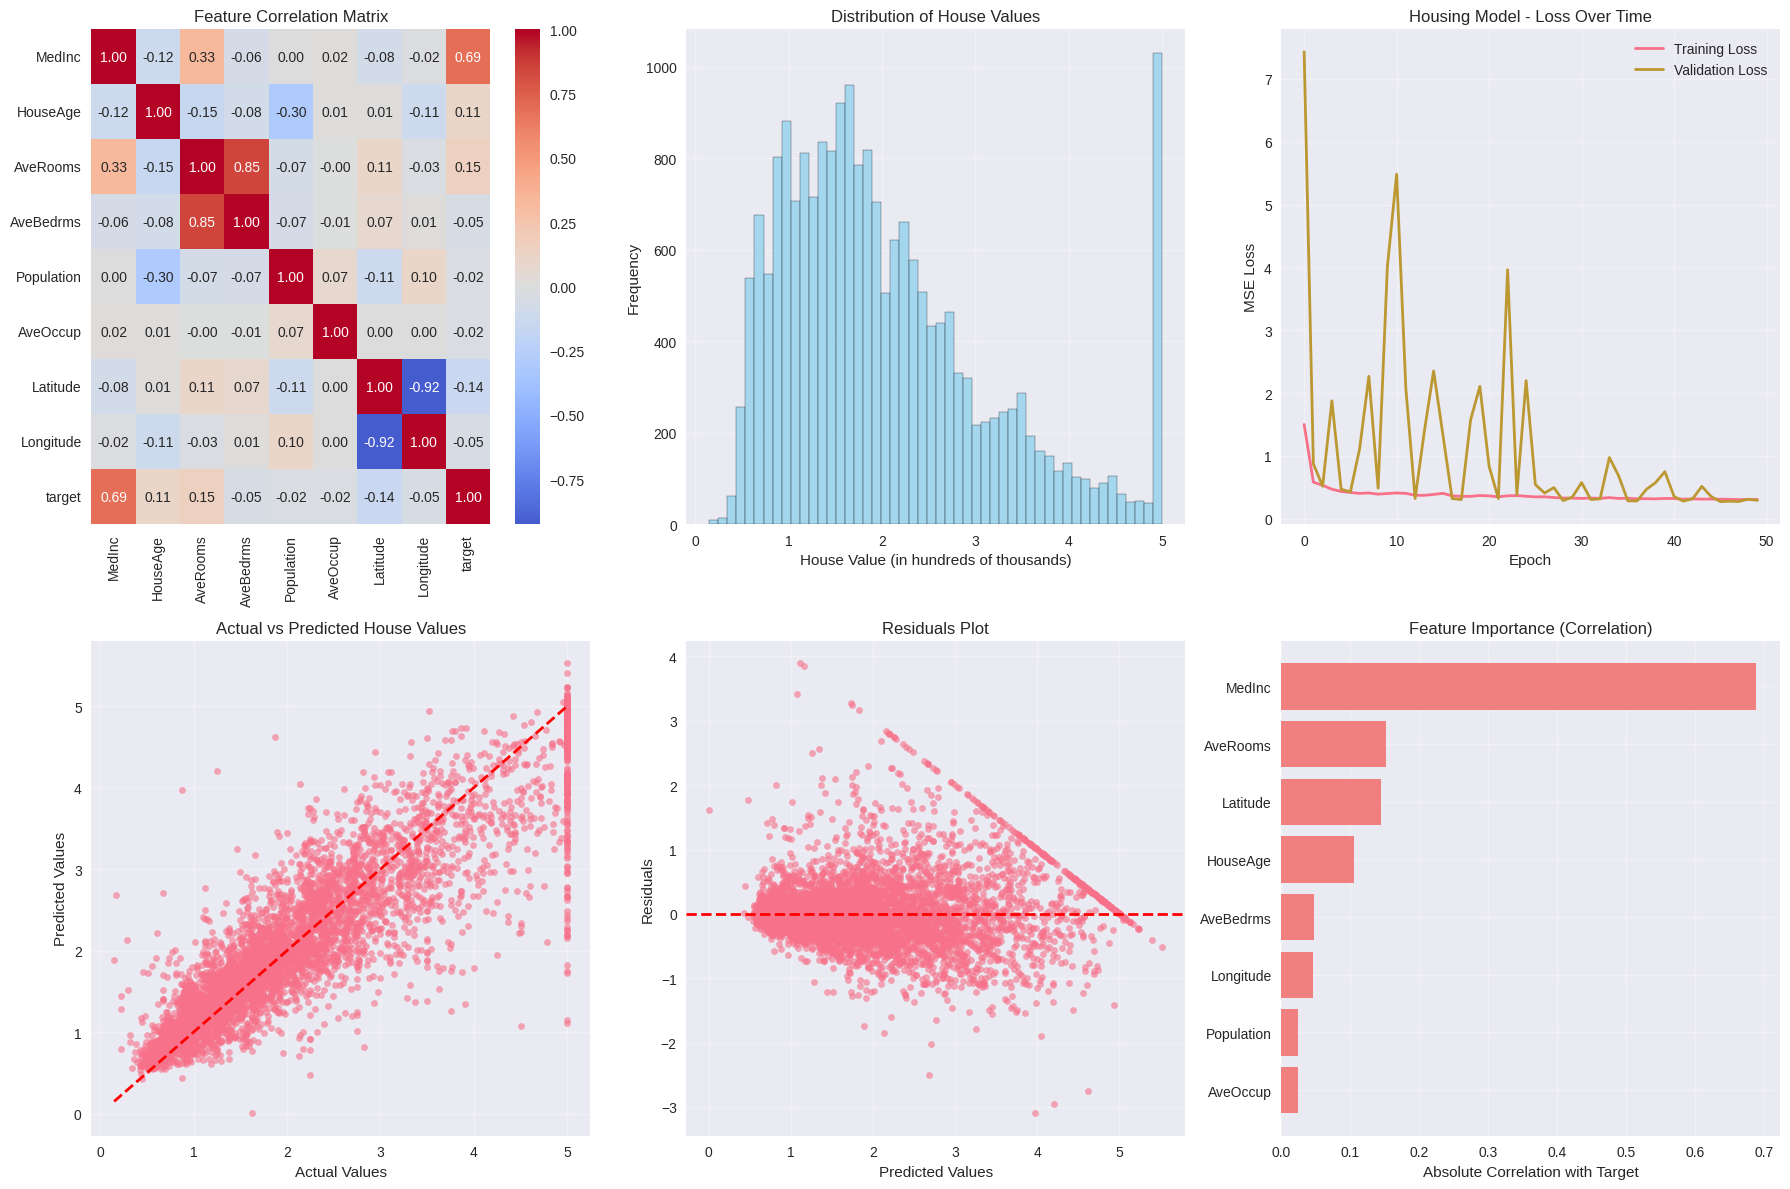

Creating Neural Network Architecture Visualizations...


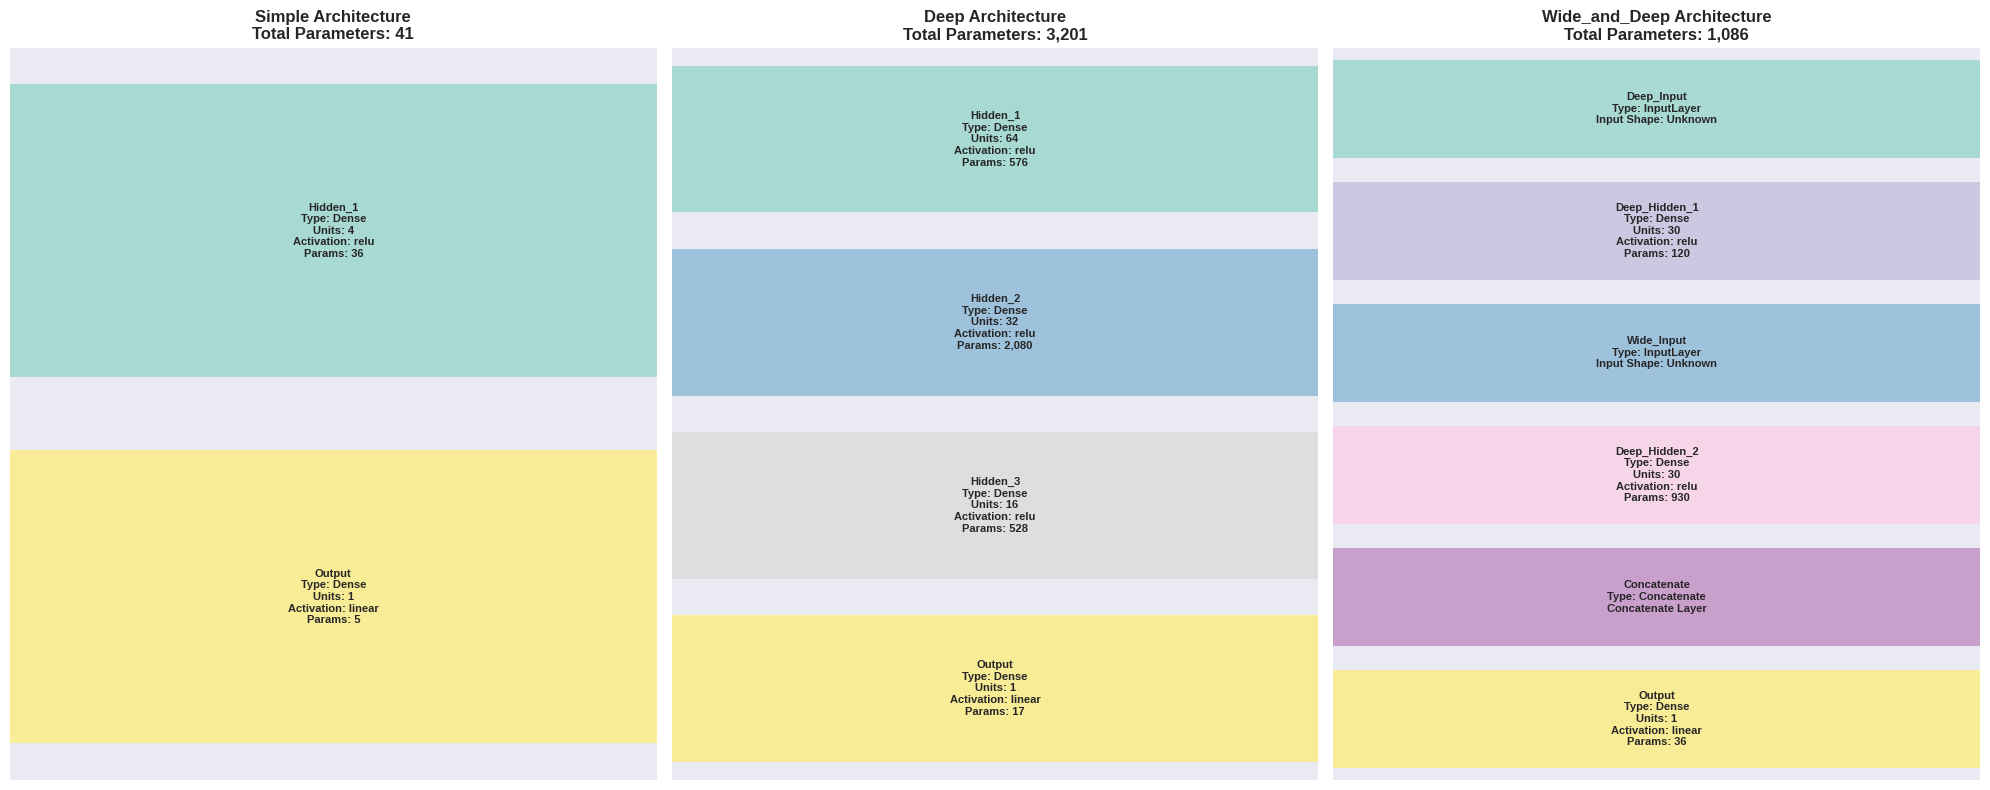

Creating Learning Curves Comparison...


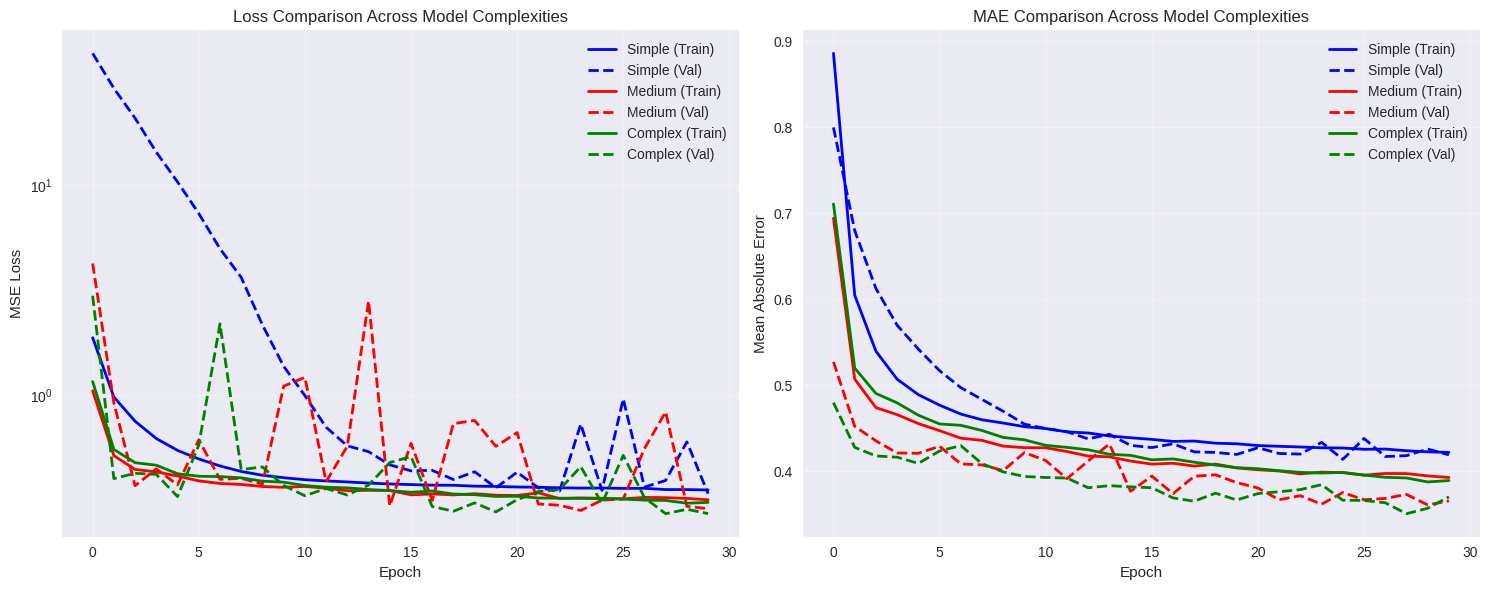


ALL VISUALIZATIONS COMPLETED SUCCESSFULLY!

Summary of visualizations created:
1. Iris Dataset Analysis (4 plots)
2. Fashion MNIST Sample Images and Training History
3. Fashion MNIST Confusion Matrix
4. California Housing Analysis (6 plots)
5. Neural Network Architecture Comparison
6. Learning Curves for Different Model Complexities


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ===== 1. IRIS DATASET VISUALIZATION =====
print("Creating Iris Dataset Visualizations...")

# Load Iris data
iris = load_iris()
X_iris = iris.data[:, (2, 3)]  # petal length, petal width
y_iris_binary = (iris.target == 0).astype(np.int32)  # Iris setosa?
y_iris_multi = iris.target

# Train perceptron
per_clf = Perceptron(random_state=42)
per_clf.fit(X_iris, y_iris_binary)

# Create mesh for decision boundary
h = 0.02
x_min, x_max = X_iris[:, 0].min() - 1, X_iris[:, 0].max() + 1
y_min, y_max = X_iris[:, 1].min() - 1, X_iris[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot Iris data and decision boundary
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Perceptron Decision Boundary
Z = per_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[0, 0].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
scatter = axes[0, 0].scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris_binary,
                            cmap=plt.cm.RdYlBu, edgecolors='black')
axes[0, 0].set_xlabel('Petal Length')
axes[0, 0].set_ylabel('Petal Width')
axes[0, 0].set_title('Perceptron Decision Boundary\n(Setosa vs Others)')
plt.colorbar(scatter, ax=axes[0, 0])

# 2. All Iris Classes
scatter2 = axes[0, 1].scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris_multi,
                             cmap='viridis', edgecolors='black', s=60)
axes[0, 1].set_xlabel('Petal Length')
axes[0, 1].set_ylabel('Petal Width')
axes[0, 1].set_title('Iris Dataset - All Classes')
plt.colorbar(scatter2, ax=axes[0, 1])

# 3. Feature Distributions
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species_name'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

for i, species in enumerate(['setosa', 'versicolor', 'virginica']):
    species_data = iris_df[iris_df['species_name'] == species]
    axes[1, 0].hist(species_data['petal length (cm)'], alpha=0.7, label=species, bins=15)
axes[1, 0].set_xlabel('Petal Length (cm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Petal Length Distribution by Species')
axes[1, 0].legend()

# 4. Correlation Matrix
corr_matrix = iris_df.iloc[:, :-2].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

# ===== 2. FASHION MNIST VISUALIZATION =====
print("Creating Fashion MNIST Visualizations...")

# Load Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot sample images
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

# Show sample images for each class
for i in range(10):
    idx = np.where(y_train_full == i)[0][0]
    row, col = i // 4, i % 4
    if row < 3:
        axes[row, col].imshow(X_train_full[idx], cmap='gray')
        axes[row, col].set_title(f'{class_names[i]}')
        axes[row, col].axis('off')

# Remove extra subplots
for i in range(10, 12):
    row, col = i // 4, i % 4
    fig.delaxes(axes[row, col])

plt.suptitle('Fashion MNIST - Sample Images', fontsize=16)
plt.tight_layout()
plt.show()

# Train a simple model for visualization
X_train = X_train_full[5000:] / 255.0
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000] / 255.0
y_valid = y_train_full[:5000]

model_fashion = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

model_fashion.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Train model
history = model_fashion.fit(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid),
                           verbose=0)

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Model Loss Over Time')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy plot
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_title('Model Accuracy Over Time')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred = model_fashion.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_valid, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Fashion MNIST - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ===== 3. CALIFORNIA HOUSING VISUALIZATION =====
print("Creating California Housing Visualizations...")

# Load housing data
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target

# Prepare data
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Train regression model
model_housing = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])

model_housing.compile(optimizer='adam', loss="mse", metrics=['mae'])

history_housing = model_housing.fit(X_train_scaled, y_train, epochs=50,
                                   validation_data=(X_valid_scaled, y_valid),
                                   verbose=0)

# Housing visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Feature correlation heatmap
corr_matrix = housing_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', ax=axes[0, 0])
axes[0, 0].set_title('Feature Correlation Matrix')

# 2. Target distribution
axes[0, 1].hist(housing_df['target'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('House Value (in hundreds of thousands)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of House Values')
axes[0, 1].grid(True, alpha=0.3)

# 3. Training history
axes[0, 2].plot(history_housing.history['loss'], label='Training Loss', linewidth=2)
axes[0, 2].plot(history_housing.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 2].set_title('Housing Model - Loss Over Time')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('MSE Loss')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Actual vs Predicted
y_pred_housing = model_housing.predict(X_test_scaled)
axes[1, 0].scatter(y_test, y_pred_housing, alpha=0.6, s=20)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].set_title('Actual vs Predicted House Values')
axes[1, 0].grid(True, alpha=0.3)

# 5. Residuals plot
residuals = y_test - y_pred_housing.flatten()
axes[1, 1].scatter(y_pred_housing, residuals, alpha=0.6, s=20)
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals Plot')
axes[1, 1].grid(True, alpha=0.3)

# 6. Feature importance (using correlation with target)
feature_importance = abs(housing_df.corr()['target'].drop('target')).sort_values(ascending=True)
axes[1, 2].barh(range(len(feature_importance)), feature_importance.values, color='lightcoral')
axes[1, 2].set_yticks(range(len(feature_importance)))
axes[1, 2].set_yticklabels(feature_importance.index)
axes[1, 2].set_xlabel('Absolute Correlation with Target')
axes[1, 2].set_title('Feature Importance (Correlation)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== 4. NEURAL NETWORK ARCHITECTURE VISUALIZATION =====
print("Creating Neural Network Architecture Visualizations...")

# Create different model architectures for visualization
models_to_visualize = {}

# Simple model
models_to_visualize['Simple'] = keras.models.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(8,), name='Hidden_1'),
    keras.layers.Dense(1, name='Output')
])

# Deep model
models_to_visualize['Deep'] = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(8,), name='Hidden_1'),
    keras.layers.Dense(32, activation='relu', name='Hidden_2'),
    keras.layers.Dense(16, activation='relu', name='Hidden_3'),
    keras.layers.Dense(1, name='Output')
])

# Wide and Deep (Functional API)
input_A = keras.layers.Input(shape=[5], name="Wide_Input")
input_B = keras.layers.Input(shape=[3], name="Deep_Input")
hidden1 = keras.layers.Dense(30, activation="relu", name="Deep_Hidden_1")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu", name="Deep_Hidden_2")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2], name="Concatenate")
output = keras.layers.Dense(1, name="Output")(concat)
models_to_visualize['Wide_and_Deep'] = keras.Model(inputs=[input_A, input_B], outputs=[output])

# Create architecture comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for i, (name, model) in enumerate(models_to_visualize.items()):
    model.compile(optimizer='adam', loss='mse')

    # Create a text representation of the architecture
    layers_info = []
    total_params = 0

    if hasattr(model, 'layers'):
        for layer in model.layers:
            layer_type = type(layer).__name__

            if hasattr(layer, 'units') and layer.units is not None:
                # Dense layers
                params = layer.count_params()
                total_params += params
                activation = getattr(layer, 'activation', 'none')
                if hasattr(activation, '__name__'):
                    activation = activation.__name__
                layers_info.append(f"{layer.name}\nType: {layer_type}\nUnits: {layer.units}\nActivation: {activation}\nParams: {params:,}")

            elif 'input' in layer_type.lower():
                # Input layers
                try:
                    # Try different ways to get input shape
                    if hasattr(layer, 'batch_input_shape') and layer.batch_input_shape:
                        shape = layer.batch_input_shape[1:]  # Remove batch dimension
                    elif hasattr(layer, '_batch_input_shape') and layer._batch_input_shape:
                        shape = layer._batch_input_shape[1:]  # Remove batch dimension
                    else:
                        shape = "Unknown"
                    layers_info.append(f"{layer.name}\nType: {layer_type}\nInput Shape: {shape}")
                except:
                    layers_info.append(f"{layer.name}\nType: {layer_type}\nInput Layer")

            elif 'concatenate' in layer_type.lower():
                # Concatenate layers
                layers_info.append(f"{layer.name}\nType: {layer_type}\nConcatenate Layer")

            else:
                # Other layers
                params = layer.count_params() if hasattr(layer, 'count_params') else 0
                total_params += params
                layers_info.append(f"{layer.name}\nType: {layer_type}\nParams: {params:,}")

    # Plot architecture summary
    if layers_info:  # Only plot if we have layer information
        y_positions = np.arange(len(layers_info))[::-1]
        colors = plt.cm.Set3(np.linspace(0, 1, len(layers_info)))

        for j, (layer_info, color) in enumerate(zip(layers_info, colors)):
            axes[i].barh(y_positions[j], 1, color=color, alpha=0.7, height=0.8)
            axes[i].text(0.5, y_positions[j], layer_info,
                        ha='center', va='center', fontsize=8, weight='bold')

        axes[i].set_xlim(0, 1)
        axes[i].set_ylim(-0.5, len(layers_info) - 0.5)
        axes[i].set_title(f'{name} Architecture\nTotal Parameters: {total_params:,}',
                         fontsize=12, weight='bold')
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['bottom'].set_visible(False)
        axes[i].spines['left'].set_visible(False)
    else:
        axes[i].text(0.5, 0.5, f'{name}\nArchitecture\nVisualization\nNot Available',
                    ha='center', va='center', fontsize=12)
        axes[i].set_xlim(0, 1)
        axes[i].set_ylim(0, 1)
        axes[i].set_xticks([])
        axes[i].set_yticks([])

plt.tight_layout()
plt.show()

# ===== 5. LEARNING CURVES COMPARISON =====
print("Creating Learning Curves Comparison...")

# Create models with different complexities
complexities = [
    {'name': 'Simple', 'units': [16, 1], 'dropout': 0.0},
    {'name': 'Medium', 'units': [64, 32, 1], 'dropout': 0.2},
    {'name': 'Complex', 'units': [128, 64, 32, 1], 'dropout': 0.3}
]

learning_curves = {}

for config in complexities:
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(config['units'][0], activation='relu',
                                input_shape=X_train_scaled.shape[1:]))

    for units in config['units'][1:-1]:
        if config['dropout'] > 0:
            model.add(keras.layers.Dropout(config['dropout']))
        model.add(keras.layers.Dense(units, activation='relu'))

    model.add(keras.layers.Dense(config['units'][-1]))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    history = model.fit(X_train_scaled, y_train, epochs=30,
                       validation_data=(X_valid_scaled, y_valid),
                       verbose=0)

    learning_curves[config['name']] = history.history

# Plot learning curves comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

colors = ['blue', 'red', 'green']
for i, (name, history) in enumerate(learning_curves.items()):
    axes[0].plot(history['loss'], label=f'{name} (Train)',
                color=colors[i], linestyle='-', linewidth=2)
    axes[0].plot(history['val_loss'], label=f'{name} (Val)',
                color=colors[i], linestyle='--', linewidth=2)

axes[0].set_title('Loss Comparison Across Model Complexities')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')

for i, (name, history) in enumerate(learning_curves.items()):
    axes[1].plot(history['mae'], label=f'{name} (Train)',
                color=colors[i], linestyle='-', linewidth=2)
    axes[1].plot(history['val_mae'], label=f'{name} (Val)',
                color=colors[i], linestyle='--', linewidth=2)

axes[1].set_title('MAE Comparison Across Model Complexities')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ALL VISUALIZATIONS COMPLETED SUCCESSFULLY!")
print("="*60)
print("\nSummary of visualizations created:")
print("1. Iris Dataset Analysis (4 plots)")
print("2. Fashion MNIST Sample Images and Training History")
print("3. Fashion MNIST Confusion Matrix")
print("4. California Housing Analysis (6 plots)")
print("5. Neural Network Architecture Comparison")
print("6. Learning Curves for Different Model Complexities")
print("="*60)